# Making ocean maps with NASA satellite data

In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# References

For netCDF (.nc) data file generation:
https://giovanni.gsfc.nasa.gov/giovanniReferences

The below code was modified from this NASA tutorial, which explains how to read netCDF ocean data into Python:
https://disc.gsfc.nasa.gov/information/howto?title=How%20to%20read%20and%20plot%20NetCDF%20MERRA-2%20data%20in%20Python

Cartopy package details:
https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/advanced_plotting.html

In [2]:
data = Dataset('g4.timeAvgMap.MODISA_L3m_CHL_8d_4km_2018_chlor_a.20190601-20190630.82W_27N_50W_46N.nc', mode='r')
#data = Dataset('g4.timeAvgMap.MODISA_L3m_NSST_Monthly_4km_R2019_0_sst.20190601-20190630.82W_27N_50W_46N.nc', mode='r')

In [3]:
data.variables

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.4
    NCO: "4.5.3"
    nco_openmp_thread_number: 1
    history: Thu Jan  7 23:06:36 2021: /usr/bin/ncks -O -x -v time_bnds timeAvgMap.MODISA_L3m_CHL_8d_4km_2018_chlor_a.20190601-20190630.82W_27N_50W_46N.nc timeAvgMap.MODISA_L3m_CHL_8d_4km_2018_chlor_a.20190601-20190630.82W_27N_50W_46N.nc
Thu Jan  7 23:06:36 2021: /usr/bin/ncatted -a valid_range,,d,, -O -o timeAvgMap.MODISA_L3m_CHL_8d_4km_2018_chlor_a.20190601-20190630.82W_27N_50W_46N.nc timeAvgMap.MODISA_L3m_CHL_8d_4km_2018_chlor_a.20190601-20190630.82W_27N_50W_46N.nc
Thu Jan  7 23:06:36 2021: /usr/bin/ncatted -O -a title,global,o,c,MODISA_L3m_CHL_8d_4km_2018_chlor_a Averaged over 2019-06-01 to 2019-06-30 timeAvgMap.MODISA_L3m_CHL_8d_4km_2018_chlor_a.20190601-20190630.82W_27N_50W_46N.nc
Thu Jan  7 23:06:35 2021: /usr/bin/ncks -x -v time -o timeAvgMap.MODISA_L3m_CHL_8d_4km_2018_chlor_a.20190601-20190630.82W_27N_50W_46N.nc 

In [5]:
#Assign the netCDF variable of interest to a python variable
lon = data.variables['lon'][:]
lat = data.variables['lat'][:]
chl = data.variables['MODISA_L3m_CHL_8d_4km_2018_chlor_a'][:][:][:]
#temp = data.variables['MODISA_L3m_NSST_Monthly_4km_R2019_0_sst'][:][:][:]

Text(-70.8, 39.6, 'St. 9')

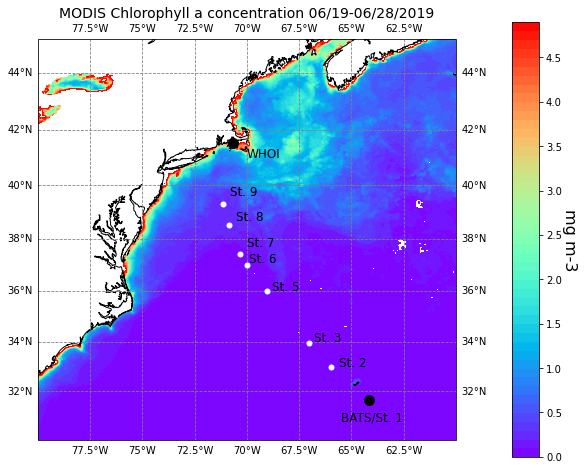

In [6]:
# Modified from: https://disc.gsfc.nasa.gov/information/howto?title=How%20to%20read%20and%20plot%20NetCDF%20MERRA-2%20data%20in%20Python

# Set the figure size, projection, and extent
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-60, -80, 30, 45])
ax.coastlines(resolution="10m",linewidth=1)
ax.gridlines(draw_labels=True, linestyle='--',color='gray')

# Set contour levels, then draw the plot and a colorbar
clevs = np.arange(0,5,.1)
#clevs = np.arange(0,40,.5)
plt.contourf(lon, lat, chl, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.rainbow)
#plt.contourf(lon, lat, temp, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.CMRmap)
plt.title('MODIS Chlorophyll a concentration 06/19-06/28/2019', size=14)
#plt.title('MODIS Sea Surface Temperature 06/19-06/28/2019', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", aspect=16, shrink=0.8, pad=0.1)
cb.set_label('mg m-3',size=16,rotation=270,labelpad=15)
#cb.set_label('deg C',size=16,rotation=270,labelpad=15)
cb.ax.tick_params(labelsize=10)

ax.plot(-64.1678, 31.669, 'ko', markersize=10, transform=ccrs.Geodetic())
ax.text(-65.5, 30.8, 'BATS/St. 1', size=12, transform=ccrs.Geodetic())
ax.plot(-70.6712, 41.5242, 'ko', markersize=10, transform=ccrs.Geodetic())
ax.text(-70, 41, 'WHOI', size=12, transform=ccrs.Geodetic())

ax.plot(-65.976848, 32.995067, 'wo', markersize=5, transform=ccrs.Geodetic())
ax.text(-65.6, 33, 'St. 2', size=12, transform=ccrs.Geodetic())
ax.plot(-67.0181, 33.945368, 'wo', markersize=5, transform=ccrs.Geodetic())
ax.text(-66.8, 34, 'St. 3', size=12, transform=ccrs.Geodetic())
ax.plot(-69.017, 35.9867, 'wo', markersize=5, transform=ccrs.Geodetic())
ax.text(-68.8, 36, 'St. 5', size=12, transform=ccrs.Geodetic())
ax.plot(-70.002,37.0028, 'wo', markersize=5, transform=ccrs.Geodetic())
ax.text(-69.9, 37.1, 'St. 6', size=12, transform=ccrs.Geodetic())
ax.plot(-70.320, 37.4131, 'wo', markersize=5, transform=ccrs.Geodetic())
ax.text(-70, 37.7, 'St. 7', size=12, transform=ccrs.Geodetic())
ax.plot(-70.8388, 38.5196, 'wo', markersize=5, transform=ccrs.Geodetic())
ax.text(-70.5, 38.7, 'St. 8', size=12, transform=ccrs.Geodetic())
ax.plot(-71.123, 39.3165, 'wo', markersize=5, transform=ccrs.Geodetic())
ax.text(-70.8, 39.6, 'St. 9', size=12, transform=ccrs.Geodetic())


In [11]:
fig.savefig('MODIS_chl.png', format='png', dpi=360)